![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

# Baseball - Analyzing pitch data

**Submitted by: A, B, C, D**

<img src=https://upload.wikimedia.org/wikipedia/commons/5/59/Baseball_diamond_marines.jpg width=800>
<p>
<a href='https://en.wikipedia.org/wiki/Baseball_field'>https://en.wikipedia.org/wiki/Baseball_field </a>
</p>

Baseball is one of the most popular sports in North America, that in the past few decades has seen its popularity rise in countries across the world. As the sport has grown, so has the technology that it uses. Major League Baseball (MLB), the largest professional league in the world, has installed high-tech cameras and other tracking tools in all 30 of its stadiums to allow teams to analyze the game using more advanced methods than ever before. High-performance computers then run complicated programs to turn the video recordings from the cameras into usable data. Teams can use this data to improve their own players' performance, as well as to learn about what their opponents are likely to do.

MLB has made this data available for anyone who wants to use it, and we can go through some of it today to see if we can learn more about the game and how data can be used to gain an advantage on our opponents!

## Getting ready

Before we get into the questions we want to ask, we need to do a little bit of work behind the scenes. All the cells in this notebook can be run without being modified, and you don't need to be too concerned if you don't understand the exact function of every line of code. If there's anything you're curious about, please ask one of your mentors to help you learn more!

#### 1. Install/Import libraries

Run the cell below to import the necessary Python libraries that we'll use in this notebook.

In [93]:
# Load libraries
import pandas as pd
import plotly.express as px

#### 2. Import data and create a dataframe

For today's challenge, we'll be looking at data about the pitches thrown in baseball. Each play starts with a pitch, so there's potentially a lot we can learn from this data. In the 2022 season, over **600,000 pitches were thrown**, which is a lot of data. We don't need quite that much data, so instead we'll focus on just one of the divisions within MLB: the American League East division. This division consists of the Toronto Blue Jays, the New York Yankees, the Boston Red Sox, the Baltimore Orioles, and the Tampa Bay Rays. In the 2022 season, the AL East had the most wins of any division in all of MLB, despite almost half of each team's games being against other teams in the division! To narrow the data even more, we'll just look at data for the month of June 2022.

There are many sources of baseball data on the internet, such as [FanGraphs](https://www.fangraphs.com/), [Baseball-Reference](https://www.baseball-reference.com/), and many more. For this challenge, though all the sites have access to MLB's data, we've downloaded the data from a website called [Baseball Savant](https://baseballsavant.mlb.com/) and stored it in a CSV file so it's easy to access. We can load it here and look at five random observations:

In [94]:
pitch_data = pd.read_csv('data/ale_pitch_data_june.csv')
pitch_data.sample(5) # Because this process is random, not everyone will get the same results below

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
7779,SI,2022-06-27,97.6,-1.89,5.54,"Abreu, Albert",657656,656061,NaN,called_strike,...,3,5,3,5,3,Standard,Standard,221.0,0.000,-0.021
6924,SI,2022-06-07,94.3,-1.96,5.46,"Whitlock, Garrett",650859,676477,NaN,ball,...,0,0,0,0,0,Standard,Standard,238.0,0.000,0.033
479,SL,2022-06-26,87.8,1.89,6.25,"Mayza, Tim",649966,641835,sac_fly,hit_into_play,...,3,3,10,10,3,Infield shift,Standard,164.0,0.001,-0.732
14422,CH,2022-06-04,90.3,-2.16,5.81,"López, Jorge",665926,605347,NaN,ball,...,5,4,5,4,5,Strategic,Standard,256.0,0.000,0.016
199,SL,2022-06-28,88.8,1.79,6.33,"Mayza, Tim",502110,641835,NaN,foul,...,4,4,4,4,4,Standard,Standard,133.0,0.000,0.000


Each row represents a single pitch, with 92 columns of data (as we can see from the information below the dataframe above). Because there are more rows than can be displayed in the notebook, Jupyter hides many of the columns in the middle of the dataframe. To see all the columns, we can use the below code:

In [95]:
pitch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18264 entries, 0 to 18263
Data columns (total 92 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   pitch_type                       18248 non-null  object 
 1   game_date                        18264 non-null  object 
 2   release_speed                    18224 non-null  float64
 3   release_pos_x                    18224 non-null  float64
 4   release_pos_z                    18224 non-null  float64
 5   player_name                      18264 non-null  object 
 6   batter                           18264 non-null  int64  
 7   pitcher                          18264 non-null  int64  
 8   events                           4726 non-null   object 
 9   description                      18264 non-null  object 
 10  spin_dir                         0 non-null      float64
 11  spin_rate_deprecated             0 non-null      float64
 12  break_angle_deprec

## Looking at the data
<img src=https://upload.wikimedia.org/wikipedia/commons/2/25/Baseball_pitching_motion_2004.jpg width=800>
<p>
<a href='https://en.wikipedia.org/wiki/Pitch_(baseball)'>https://en.wikipedia.org/wiki/Pitch_(baseball) </a>
</p>

The above function tell us:
1. There are 18,264 pitches (rows) in the data
1. The name of each column, in order
1. How many rows in each column contain data (are 'non-null')
1. The type of data each column contains

Some of the column names provide a good description of the data they contain, but ideally we don't have to guess, and we can know exactly what the data represent. Thankfully, the [Baseball Savant](https://baseballsavant.mlb.com/csv-docs) website provides descriptions for each column. There's quite a few, so hold on tight:

0.   **pitch_type** - The type of pitch derived from Statcast.
1.   **game_date** - Date of the Game.
2.   **release_speed** - Pitch velocities from 2008-16 are via Pitch F/X, and adjusted to roughly out-of-hand release point. All velocities from 2017 and beyond are Statcast, which are reported out-of-hand.
3.   **release_pos_x** - Horizontal Release Position of the ball measured in feet from the catcher's perspective.
4.   **release_pos_z** - Vertical Release Position of the ball measured in feet from the catcher's perspective.
5.   **player_name** - Player's name tied to the event.
6.   **batter** - MLB Player Id tied to the play event.
7.   **pitcher** - MLB Player Id tied to the play event.
8.   **events** - Event of the resulting Plate Appearance.
9.   **description** - Description of the resulting pitch.
10.  **spin_dir** - * Deprecated field from the old tracking system.
11.  **spin_rate_deprecated** - * Deprecated field from the old tracking system. Replaced by release_spin
12.  **break_angle_deprecated** - * Deprecated field from the old tracking system.
13.  **break_length_deprecated** - * Deprecated field from the old tracking system.
14.  **zone** - Zone location of the ball when it crosses the plate from the catcher's perspective.
15.  **des** - Plate appearance description from game day.
16.  **game_type** - Type of Game. E = Exhibition, S = Spring Training, R = Regular Season, F = Wild Card, D = Divisional Series, L = League Championship Series, W = World Series
17.  **stand** - Side of the plate batter is standing.
18.  **p_throws** - Hand pitcher throws with.
19.  **home_team** - Abbreviation of home team.
20.  **away_team** - Abbreviation of away team.
21.  **type** - Short hand of pitch result. B = ball, S = strike, X = in play.
22.  **hit_location** - Position of first fielder to touch the ball.
23.  **bb_type** - Batted ball type, ground_ball, line_drive, fly_ball, popup.
24.  **balls** - Pre-pitch number of balls in count.
25.  **strikes** - Pre-pitch number of strikes in count.
26.  **game_year** - Year game took place.
27.  **pfx_x** - Horizontal movement in feet from the catcher's perspective.
28.  **pfx_z** - Vertical movement in feet from the catcher's perpsective.
29.  **plate_x** - Horizontal position of the ball when it crosses home plate from the catcher's perspective.
30.  **plate_z** - Vertical position of the ball when it crosses home plate from the catcher's perspective.
31.  **on_3b** - Pre-pitch MLB Player Id of Runner on 3B.
32.  **on_2b** - Pre-pitch MLB Player Id of Runner on 2B.
33.  **on_1b** - Pre-pitch MLB Player Id of Runner on 1B.
34.  **outs_when_up** - Pre-pitch number of outs.
35.  **inning** - Pre-pitch inning number.
36.  **inning_topbot** - Pre-pitch top or bottom of inning.
37.  **hc_x** - Hit coordinate X of batted ball.
38.  **hc_y** - Hit coordinate Y of batted ball.
39.  **tfs_deprecated** - * Deprecated field from old tracking system.
40.  **tfs_zulu_deprecated** - * Deprecated field from old tracking system.
41.  **fielder_2** - Pre-pitch MLB Player Id of Catcher.
42.  **umpire** - * Deprecated field from old tracking system.
43.  **sv_id** - Non-unique Id of play event per game.
44.  **vx0** - The velocity of the pitch, in feet per second, in x-dimension, determined at y=50 feet.
45.  **vy0** - The velocity of the pitch, in feet per second, in y-dimension, determined at y=50 feet.
46.  **vz0** - The velocity of the pitch, in feet per second, in z-dimension, determined at y=50 feet.
47.  **ax** - The acceleration of the pitch, in feet per second per second, in x-dimension, determined at y=50 feet.
48.  **ay** - The acceleration of the pitch, in feet per second per second, in y-dimension, determined at y=50 feet.
49.  **az** - The acceleration of the pitch, in feet per second per second, in z-dimension, determined at y=50 feet.
50.  **sz_top** - Top of the batter's strike zone set by the operator when the ball is halfway to the plate.
51.  **sz_bot** - Bottom of the batter's strike zone set by the operator when the ball is halfway to the plate.
52.  **hit_distance_sc** - Projected hit distance of the batted ball.
53.  **launch_speed** - Exit velocity of the batted ball as tracked by Statcast. For the limited subset of batted balls not tracked directly, estimates are included based on the process described here.
54.  **launch_angle** - Launch angle of the batted ball as tracked by Statcast. For the limited subset of batted balls not tracked directly, estimates are included based on the process described here.
55.  **effective_speed** - Derived speed based on the the extension of the pitcher's release.
56.  **release_spin_rate** - Spin rate of pitch tracked by Statcast.
57.  **release_extension** - Release extension of pitch in feet as tracked by Statcast.
58.  **game_pk** - Unique Id for Game.
59.  **pitcher.1** - MLB Player Id tied to the play event.
60.  **fielder_2.1** - MLB Player Id for catcher.
61.  **fielder_3** - MLB Player Id for 1B.
62.  **fielder_4** - MLB Player Id for 2B.
63.  **fielder_5** - MLB Player Id for 2B.
64.  **fielder_6** - MLB Player Id for SS.
65.  **fielder_7** - MLB Player Id for LF.
66.  **fielder_8** - MLB Player Id for CF.
67.  **fielder_9** - MLB Player Id for RF.
68.  **release_pos_y** - Release position of pitch measured in feet from the catcher's perspective.
69.  **estimated_ba_using_speedangle** - Estimated Batting Avg based on launch angle and exit velocity.
70.  **estimated_woba_using_speedangle** - Estimated wOBA based on launch angle and exit velocity.
71.  **woba_value** - wOBA value based on result of play.
72.  **woba_denom** - wOBA denominator based on result of play.
73.  **babip_value** - BABIP value based on result of play.
74.  **iso_value** - ISO value based on result of play.
75.  **launch_speed_angle** - Launch speed/angle zone based on launch angle and exit velocity: \
    1\.  Weak  
    2\.  Topped  
    3\.  Under  
    4\.  Flare/Burner  
    5\.  Solid Contact  
    6\.  Barrel  
76.  **at_bat_number** - Plate appearance number of the game.
77.  **pitch_number** - Total pitch number of the plate appearance.
78.  **pitch_name** - The name of the pitch derived from the Statcast Data.
79.  **home_score** - Pre-pitch home score
80.  **away_score** - Pre-pitch away score
81.  **bat_score** - Pre-pitch bat team score
82.  **fld_score** - Pre-pitch field team score
83.  **post_away_score** - Post-pitch home score
84.  **post_home_score** - Post-pitch away score
85.  **post_bat_score** - Post-pitch bat team score
86.  **post_fld_score** - Post-pitch field team score
87.  **if_fielding_alignment** - Infield fielding alignment at the time of the pitch.
88.  **of_fielding_alignment** - Outfield fielding alignment at the time of the pitch.
89.  **spin_axis** - The Spin Axis in the 2D X-Z plane in degrees from 0 to 360, such that 180 represents a pure backspin fastball and 0 degrees represents a pure topspin (12-6) curveball
90.  **delta_home_win_exp** - The change in Win Expectancy before the Plate Appearance and after the Plate Appearance
91.  **delta_run_exp** - The change in Run Expectancy before the Pitch and after the Pitch
    
That's a lot of columns of data! We probably won't use them all, but later on feel free to use whatever you want to get creative with your analysis.

## Preparing the data
Sure, those numbers are great, but they'd be a lot more meaningful if we could visualize them. To start, let's look at the speed at which each of the pitchers in the dataset throws. As a first step, let's see how many pitchers are in the dataset:

In [96]:
display(sorted(pitch_data['player_name'].unique().tolist()))
print(f'\nThere are {len(pitch_data["player_name"].unique())} pitchers appearing in this dataset') # Make list of unique player names, and print the length of that list

['Abreu, Albert',
 'Adam, Jason',
 'Akin, Keegan',
 'Anderson, Shaun',
 'Armstrong, Shawn',
 'Baker, Bryan',
 'Bard, Luke',
 'Baumann, Mike',
 'Bautista, Félix',
 'Baz, Shane',
 'Bañuelos, Manny',
 'Beasley, Jeremy',
 'Beeks, Jalen',
 'Berríos, José',
 'Bradish, Kyle',
 'Brasier, Ryan',
 'Castillo, Max',
 'Castro, Miguel',
 'Cimber, Adam',
 'Cole, Gerrit',
 'Cortes, Nestor',
 'Crawford, Kutter',
 'Danish, Tyler',
 'Davis, Austin',
 'Diekman, Jake',
 'Eovaldi, Nathan',
 'Faucher, Calvin',
 'Feyereisen, J.P.',
 'Gage, Matt',
 'Garcia, Rico',
 'Garcia, Yimi',
 'Garza Jr., Ralph',
 'Gausman, Kevin',
 'Gillaspie, Logan',
 'Hill, Rich',
 'Holmes, Clay',
 'Houck, Tanner',
 'Kikuchi, Yusei',
 'King, Michael',
 'Kittredge, Andrew',
 'Kluber, Corey',
 'Krehbiel, Joey',
 'Kremer, Dean',
 'Lawrence, Casey',
 'Luetge, Lucas',
 'Lyles, Jordan',
 'López, Jorge',
 'Manoah, Alek',
 'Marinaccio, Ron',
 'Mayza, Tim',
 'McClanahan, Shane',
 'Merryweather, Julian',
 'Montgomery, Jordan',
 'Peralta, Wandy',


There are 90 pitchers appearing in this dataset


90 is a lot of pitchers, so we'll first filter down the list to only include a smaller sample. 

How do we determine which pitchers to include? Well, a good next step is to plot the data:

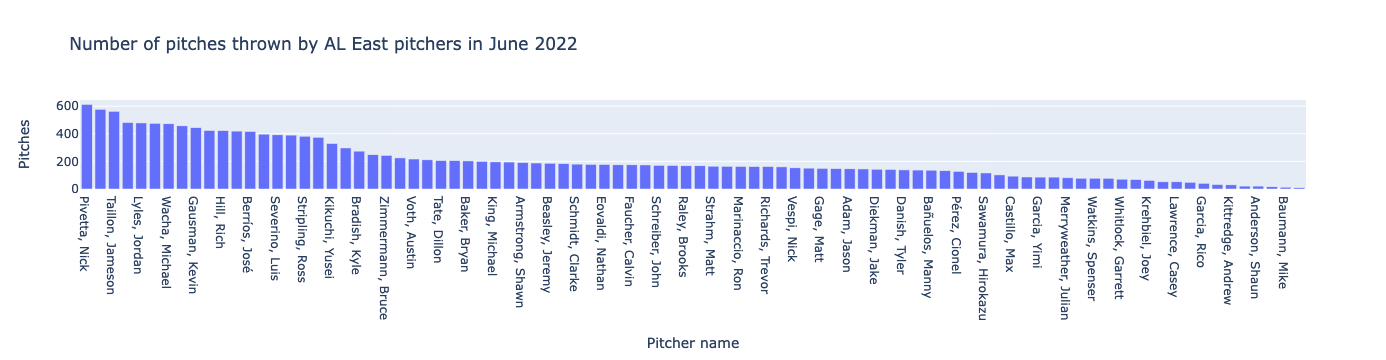

In [97]:
pitchers = pitch_data['player_name'].value_counts() # Counting instances of each pitcher's name in the dataset
px.bar(pitchers, labels={'value':'Pitches', 'index':'Pitcher name'}, title='Number of pitches thrown by AL East pitchers in June 2022').update_layout(showlegend=False)

There are a few "bumps" in the plot above that we could probably use as a cutoff point for determining how many pitchers we want to focus on. Our decision of where to cut the data is arbitrary, but perhaps using 400 pitches as a cutoff (between Corey Kluber and José Berríos) allows us to use a manageable number of pitchers without getting too overwhelming.

In [109]:
top_pitchers = pitchers[0:13] # 'Slice' the dataframe by taking only the rows starting at the 0th row, and up to (but not including) the 13th row, for 13 total names
top_pitchers

Pivetta, Nick         612
Manoah, Alek          577
Taillon, Jameson      562
Cole, Gerrit          481
Lyles, Jordan         478
McClanahan, Shane     475
Wacha, Michael        472
Montgomery, Jordan    457
Gausman, Kevin        444
Cortes, Nestor        423
Hill, Rich            422
Kremer, Dean          419
Berríos, José         416
Name: player_name, dtype: int64

## Visualizing the data

Now we can plot the pitches each pitcher throws!

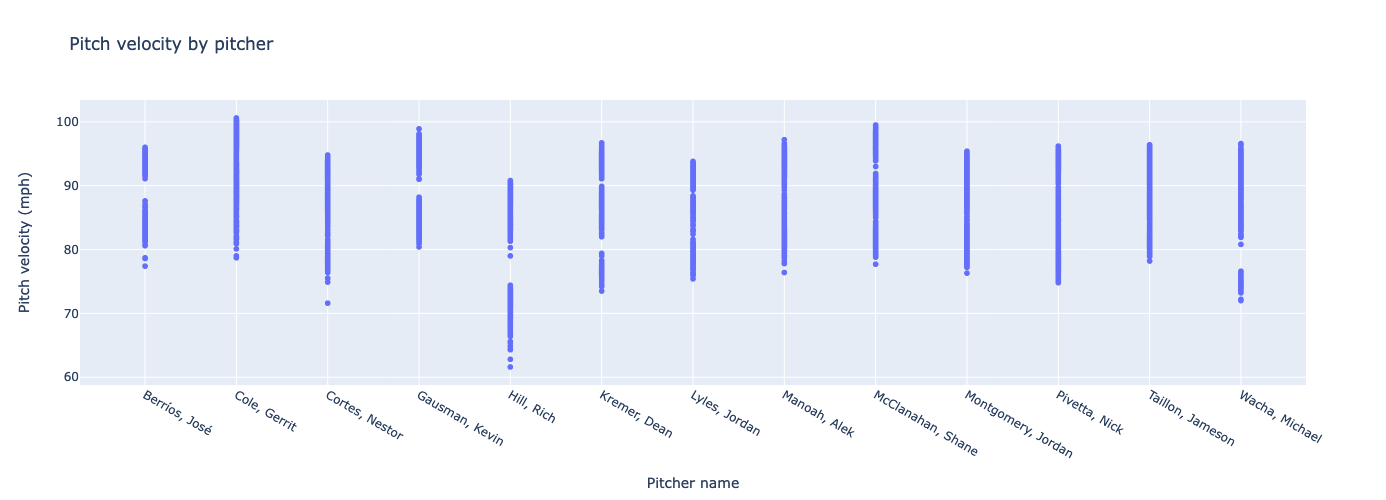

In [99]:
px.scatter(pitch_data[pitch_data['player_name'].isin(top_pitchers.index)].sort_values('player_name'), # Filter original dataset to only include pitchers who's name is in our list of 13
           x='player_name', y='release_speed', # Choose the variables to plot
           labels={'release_speed':'Pitch velocity (mph)', 'player_name':'Pitcher name'}, # Rename the axes labels to be a little prettier
           title='Pitch velocity by pitcher', height=500) # Title the plot and make sure it's tall enough to be easily viewable

## Using expert knowledge

If you're a baseball fan, you likely know that pitchers will use different types of pitches to fool the batter (and if you're not a baseball fan, the next few steps will help you learn that knowledge). Though a pitch with more speed can definitely be difficult to hit, not every pitch relies on its velocity. We can further break down the same plot by pitch type:

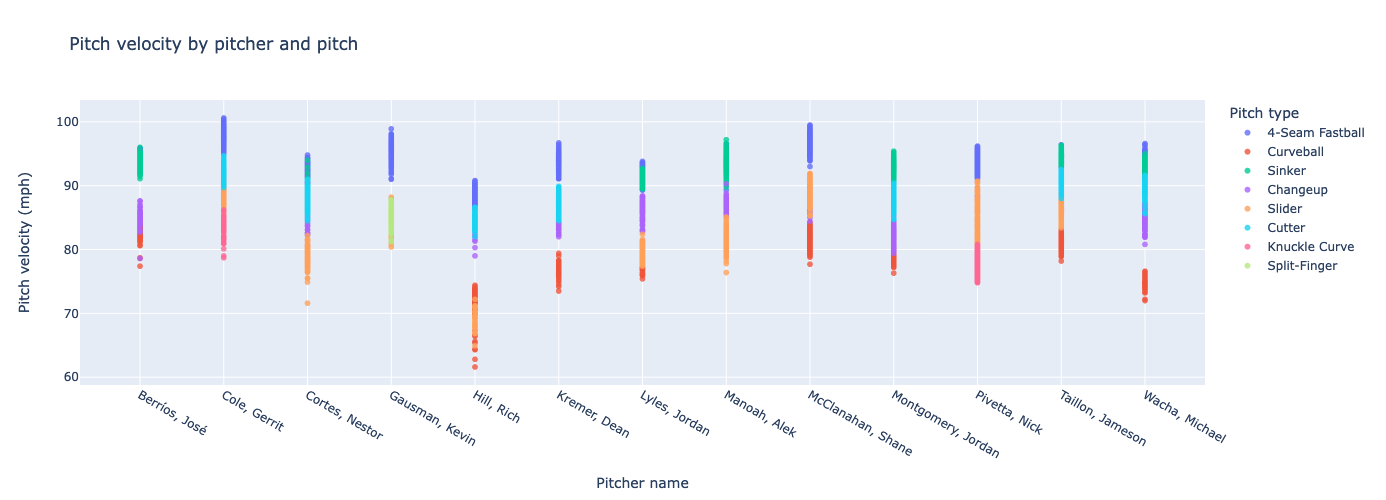

In [100]:
px.scatter(pitch_data[pitch_data['player_name'].isin(top_pitchers.index)].sort_values('player_name'), 
           x='player_name', y='release_speed', color='pitch_name', opacity=0.8, # Now colour the pitches by type, and make the symbols slightly more transparent
           labels={'release_speed':'Pitch velocity (mph)', 'player_name':'Pitcher name', 'pitch_name':'Pitch type'},
           title='Pitch velocity by pitcher and pitch', height=500)

Fast pitches are certainly hard to hit, but as we see above there's clearly some kind of relationship between type of pitch and its speed. For pitches that don't rely on speed to fool the batter, they usually use *movement*. How a ball moves through the air, and how its movement is changed by the amount of *spin* on the ball is a fairly complicated topic, but for further learning you can check out [this YouTube video](https://www.youtube.com/watch?v=0lbQwFmwBNs) for a good explanation. We can build on this later, but for now we can consider *spin rate* to be a good measurement for pitch movement.

Ignoring individual pitchers for a second, we can plot the relationship between pitch velocity and spin rate, and see how that relates to pitch type:

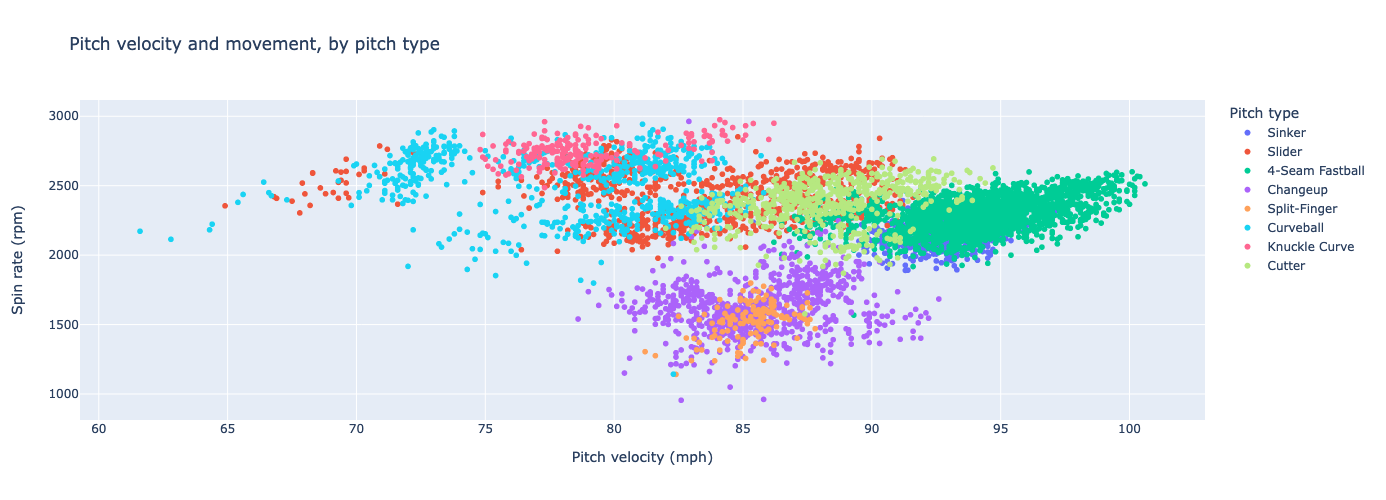

In [101]:
px.scatter(pitch_data[pitch_data['player_name'].isin(top_pitchers.index)], 
           x='release_speed', y='release_spin_rate', color='pitch_name', # Compare velocity and spin rate
           labels={'release_speed':'Pitch velocity (mph)', 'release_spin_rate':'Spin rate (rpm)', 'pitch_name':'Pitch type'},
           title='Pitch velocity and movement, by pitch type', height=500)

Building on our knowledge that pitchers use either velocity **or** spin rate to fool the batter, let's replicate one of our earlier plots, but this time looking at spin rate:

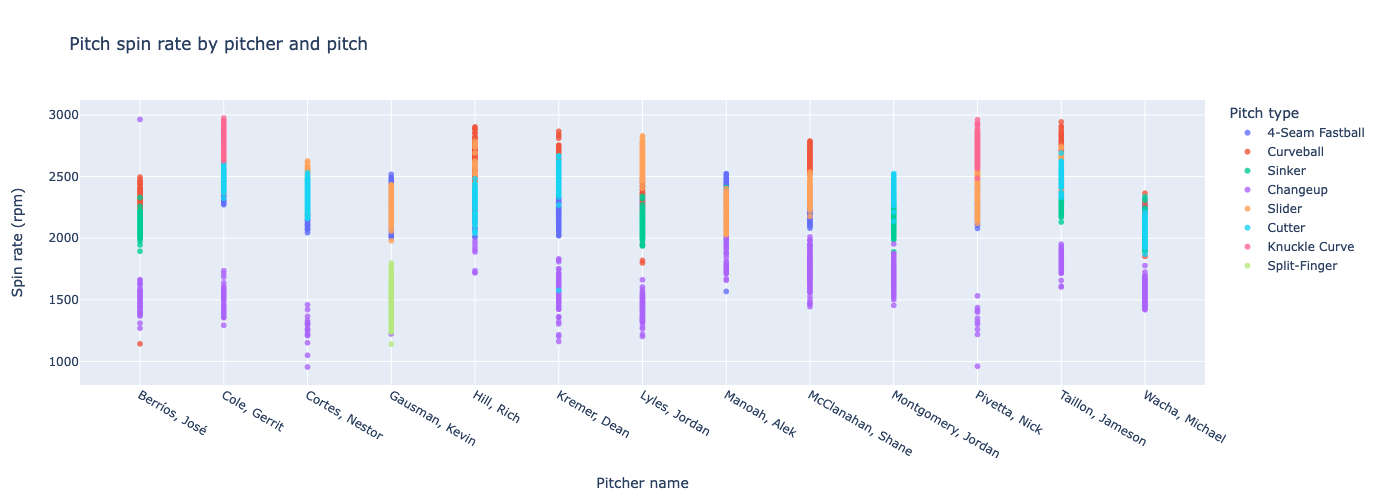

In [102]:
px.scatter(pitch_data[pitch_data['player_name'].isin(top_pitchers.index)].sort_values('player_name'), 
           x='player_name', y='release_spin_rate', color='pitch_name', opacity=0.8,
           labels={'release_spin_rate':'Spin rate (rpm)', 'player_name':'Pitcher name', 'pitch_name':'Pitch type'},
           title='Pitch spin rate by pitcher and pitch', height=500)

When we looked at each pitcher's velocity, and coloured it by pitch type, there was a lot of overlap between different types of pitches. Knowing now that spin rate is another important factor in how effective certain pitches are, and plotting that instead of velocity, we can see that the difference between pitches is even clearer yet.

## Diving into the data

In baseball jargon, pitches that rely on *speed* to fool the batter are generally known as **fastballs**, whereas those that rely on *movement* (through increased spin rate) are collectively referred to as **breaking balls**. You can find a good breakdown of the pitch types [here](https://www.rookieroad.com/baseball/pitch-types/), as well as the below image that shows the movement of the most common pitches:

<img src=https://appliedvisionbaseball.com/wp-content/uploads/2019/10/nipponfoodie-31-1024x576.png width=800>
<p>
<a href='https://appliedvisionbaseball.com/how-to-identify-pitch-types-spin-speed-location/'>https://appliedvisionbaseball.com/how-to-identify-pitch-types-spin-speed-location/ </a>
</p>

Let's see exactly which pitch types exist in this dataset (going back to all 90 pitchers):

In [103]:
pitch_types = pitch_data['pitch_name'].unique() # List unique values in 'pitch_name' variable
pitch_types

array(['Sinker', 'Slider', 'Cutter', '4-Seam Fastball', 'Knuckle Curve',
       'Changeup', 'Curveball', 'Split-Finger', nan], dtype=object)

We can then create two lists: one that contains all the fastballs, and one that contains the breaking balls. We do this by using the `[#]` notation to refer to a particular entry's position in a list, starting (as always in Python) with 0:

In [104]:
fastballs = [pitch_types[0], pitch_types[2], pitch_types[3]]
breaking_balls = [pitch_types[1], pitch_types[4], pitch_types[6], pitch_types[7]]
display(fastballs)
display(breaking_balls)

['Sinker', 'Cutter', '4-Seam Fastball']

['Slider', 'Knuckle Curve', 'Curveball', 'Split-Finger']

A keen eye will notice that fastballs and breaking balls don't account for all of our pitches. There are two remaining pitches: 'Changeup', and 'nan'.

A changeup is a pitch that is neither a fastball nor a breaking ball. The goal of a changeup is to *appear* as a fastball when it's leaving the pitcher's hand, but to have a significantly lower velocity, causing the batter to swing much earlier and miss the ball.

<div class="alert alert-block alert-success">
<b>Note:</b>
On the other hand, a <b>nan</b> is not a pitch at all. Often in programming languages, you'll encounter a data type that represents non-existent data. This is different than zero; imagine considering temperature. If you have a dataset that contains temperatures, if you have a value of <b>0</b>, you would assume that you've measured a real temperature right at freezing. However, a value of <b>nan</b> indicates that a value <i>should</i> exist, but for whatever reason doesn't. Depending on the language and/or the source of the data, this could be written as <b>nan, NaN, NA, or null.</b>
</div>

## Cleaning

One of the most time-consuming parts of data science is 'cleaning' your data. Cleaning entails looking at your data and ensuring it represents what you think it does, and ensuring that any anomalies are identified and can be either explained or removed. Knowing that we have entries in our data where there isn't a particular data point for the pitch name in the dataset, we can look at just those rows and it can help guide us as to what we do with the data.

We'll filter our original dataset to look for just those rows that have a `pitch_name` of **nan**, which the pandas library treats as 'null':

In [105]:
pitch_data[pitch_data['pitch_name'].isnull()] # Return all rows where the value for 'pitch_name' is equal to nan/NaN/null

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
10077,NaN,2022-06-10,NaN,NaN,NaN,"Holmes, Clay",666624,605280,force_out,hit_into_play,...,1,1,1,1,1,Standard,Standard,NaN,0.064,-0.183
10079,NaN,2022-06-10,NaN,NaN,NaN,"Holmes, Clay",663611,605280,single,hit_into_play,...,1,1,1,1,1,Standard,Strategic,NaN,-0.032,0.100
10082,NaN,2022-06-10,NaN,NaN,NaN,"Holmes, Clay",663611,605280,NaN,ball,...,1,1,1,1,1,Standard,Strategic,NaN,0.000,0.042
10086,NaN,2022-06-10,NaN,NaN,NaN,"Holmes, Clay",518792,605280,NaN,called_strike,...,1,1,1,1,1,Strategic,Standard,NaN,0.000,-0.024
10092,NaN,2022-06-10,NaN,NaN,NaN,"King, Michael",621550,650633,walk,ball,...,1,1,1,1,1,Standard,Standard,NaN,-0.026,0.101
10093,NaN,2022-06-10,NaN,NaN,NaN,"King, Michael",621550,650633,NaN,ball,...,1,1,1,1,1,Standard,Standard,NaN,0.000,0.033
10106,NaN,2022-06-10,NaN,NaN,NaN,"Castro, Miguel",575929,612434,NaN,ball,...,1,1,1,1,1,Standard,Standard,NaN,0.000,0.030
10108,NaN,2022-06-10,NaN,NaN,NaN,"Castro, Miguel",666624,612434,double,hit_into_play,...,1,1,1,1,1,Infield shift,Standard,NaN,-0.044,0.226
10109,NaN,2022-06-10,NaN,NaN,NaN,"Castro, Miguel",666624,612434,NaN,ball,...,1,1,1,1,1,Infield shift,Standard,NaN,0.000,0.011
10111,NaN,2022-06-10,NaN,NaN,NaN,"Castro, Miguel",663611,612434,strikeout,swinging_strike,...,1,1,1,1,1,Standard,Strategic,NaN,0.028,-0.100


In our dataframe of 18,264 entries, 16 of them contain that null value for `pitch_name`. Though the `pitch_name` column isn't shown above, the remaining columns give us some insight into how valuable the data is, to help us decide whether to keep or remove the data.

Taking a look at the `description` column, every single one of these pitches resulted in a valid play, so in this instance it may be worth keeping the data in the original dataset. Though we can't be 100% sure, what likely happened is that whatever system MLB uses to classify pitches strugggled to classify these ones, but they were still valid pitches.

## Filtering data

Now that we are satisfied with the types of pitches existing in the dataset, we can compare the two groups of pitches and compare it across pitchers:

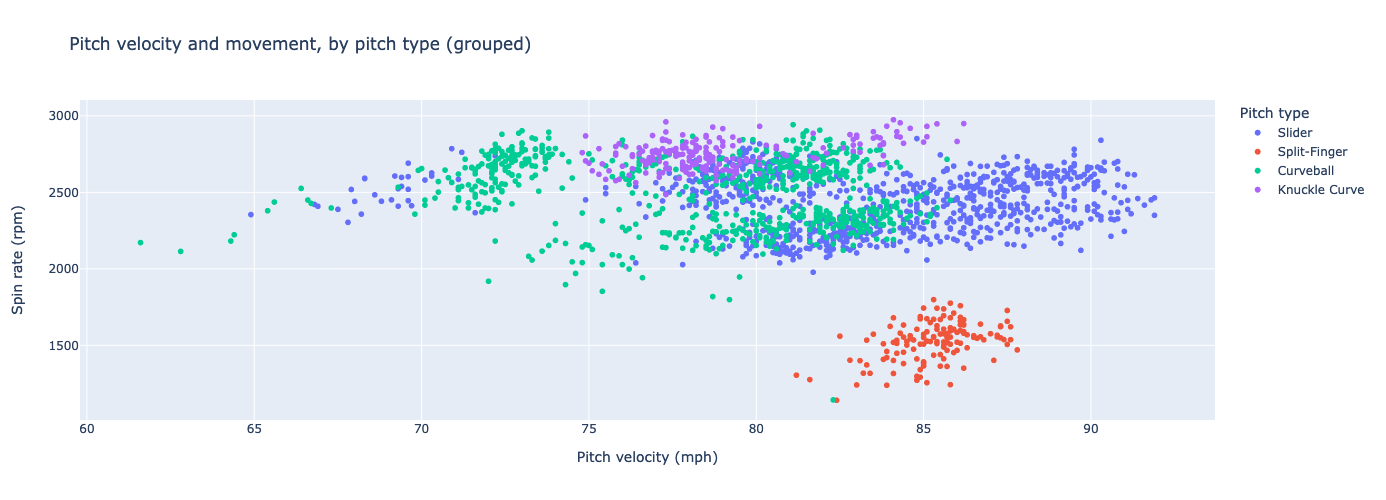

In [106]:
# Change the value here to one of `fastballs` or `breaking_balls` to switch the types of pitches shown
grouping = breaking_balls


px.scatter(pitch_data[(pitch_data['player_name'].isin(top_pitchers.index)) & (pitch_data['pitch_name'].isin(grouping))], # Filter first by the top 13 pitchers, then by the pitches contained in the 'grouping' variable
           x='release_speed', y='release_spin_rate', color='pitch_name',
           labels={'release_speed':'Pitch velocity (mph)', 'release_spin_rate':'Spin rate (rpm)', 'pitch_name':'Pitch type'},
           title='Pitch velocity and movement, by pitch type (grouped)', height=500)

Or, if we want to look at the same relationship for all the pitches from a single pitcher, we can do so using the code below:

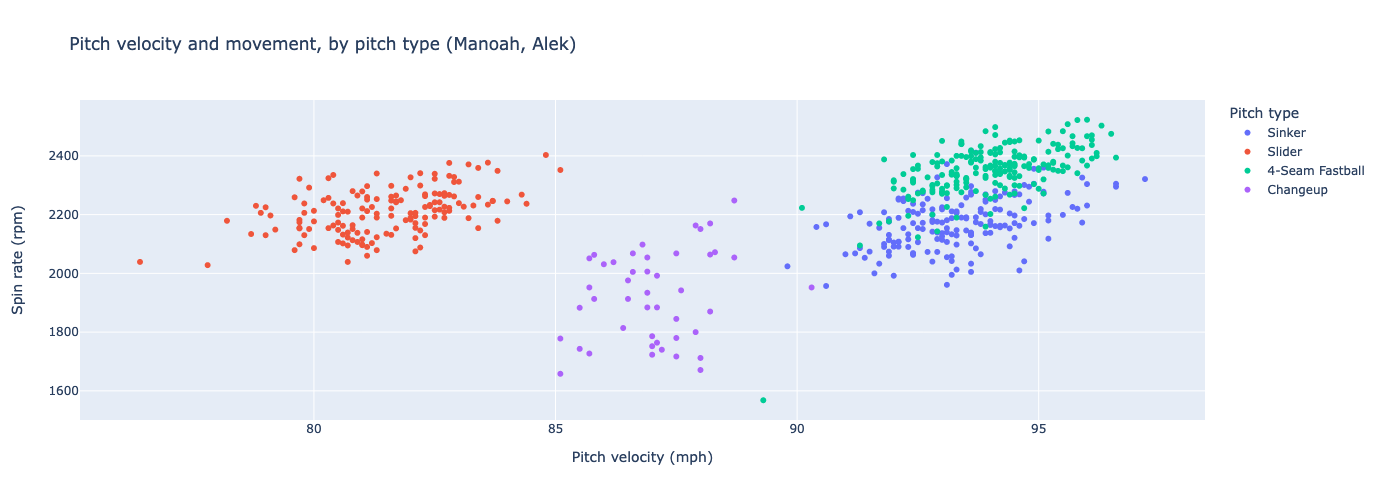

In [107]:
# Change the pitcher name here to look at any individual pitcher. Use the list generated at 'Preparing the Data' to ensure proper spelling and formatting
pitcher = 'Manoah, Alek'


px.scatter(pitch_data[pitch_data['player_name']==pitcher], # Find rows only where the 'player_name' matches the value assigned to 'pitcher'
           x='release_speed', y='release_spin_rate', color='pitch_name',
           labels={'release_speed':'Pitch velocity (mph)', 'release_spin_rate':'Spin rate (rpm)', 'pitch_name':'Pitch type'},
           title=f'Pitch velocity and movement, by pitch type ({pitcher})', height=500)

## Next steps

This has been a quick intro into baseball data, and how we can visualize relationships between variables to learn more about how they interact with each other. We've only looked at a small selection of the available data, and there are probably some questions you might have that we didn't even attempt to answer. We've walked through a few aspects you can use to help guide your analysis, but we've barely scratched the surface of what we can do.

For further analysis of this data, and to learn the skills to allow you to answer any other questions you can come up with, continue on to the next notebook.

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)